supervised learning ai


In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('winequality-red.csv')

In [11]:
print(df.isnull())

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
4             False             False        False           False      False   
...             ...               ...          ...             ...        ...   
1594          False             False        False           False      False   
1595          False             False        False           False      False   
1596          False             False        False           False      False   
1597          False             False        False           False      False   
1598          False             False        False           False      False   

      free sulfur dioxide  

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [13]:
df.shape

(1599, 12)

In [48]:
PH = df['pH'].values
Acid = df['fixed acidity'].values
Qual = df['quality'].values

X = np.column_stack((PH, Acid))
y = Qual

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [49]:
y_prediction = model.predict(X_test)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R^2 Score:", model.score(X_test, y_test))

Coefficients: [0.36334576 0.07926807]
Intercept: 3.760848155934111
R^2 Score: 0.006771968620235658


plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted')


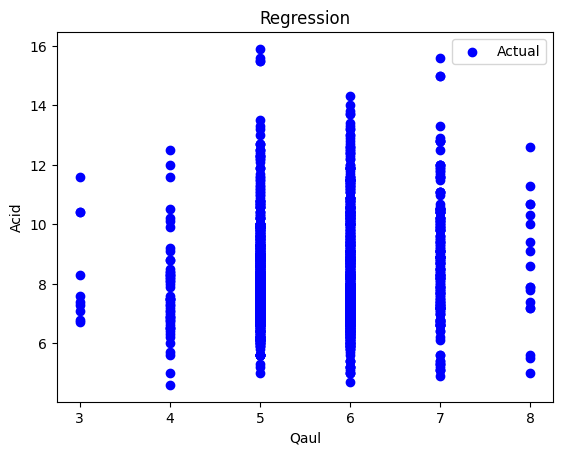

In [50]:

plt.scatter(Qual, Acid, color='blue', label='Actual')
plt.xlabel('Qaul')
plt.ylabel('Acid')
plt.legend()
plt.title('Regression')
plt.show()

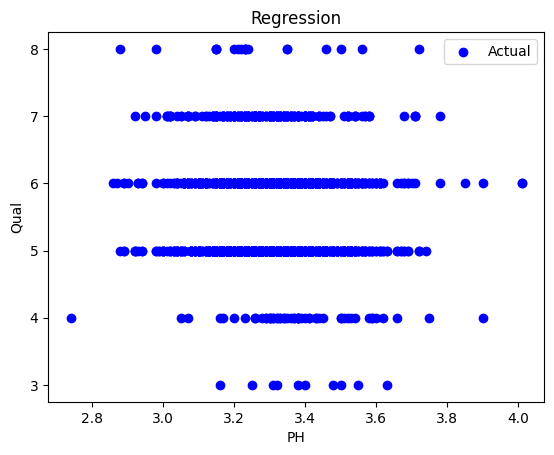

In [51]:
plt.scatter(PH, Qual, color='blue', label='Actual')
plt.xlabel('PH')
plt.ylabel('Qual')
plt.legend()
plt.title('Regression')
plt.show()

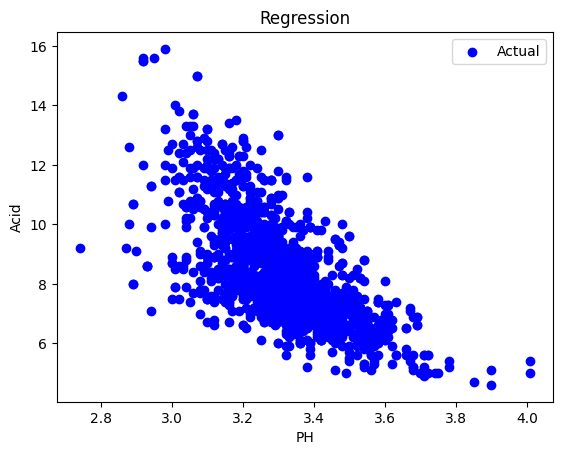

In [57]:
plt.scatter(PH, Acid, color='blue', label='Actual')
plt.xlabel('PH')
plt.ylabel('Acid')
plt.legend()
plt.title('Regression')
plt.show()

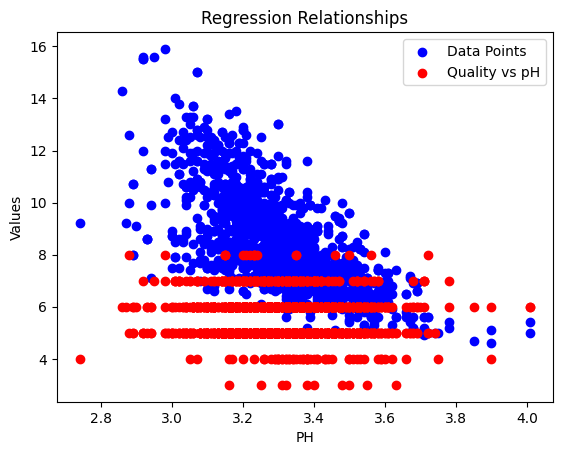

In [42]:
plt.scatter(PH, Acid, color='blue', label='Data Points')
plt.scatter(PH, Qual, color='red', label='Quality vs pH')
plt.xlabel('PH')
plt.ylabel('Values')
plt.legend()
plt.title('Regression Relationships')
plt.show()


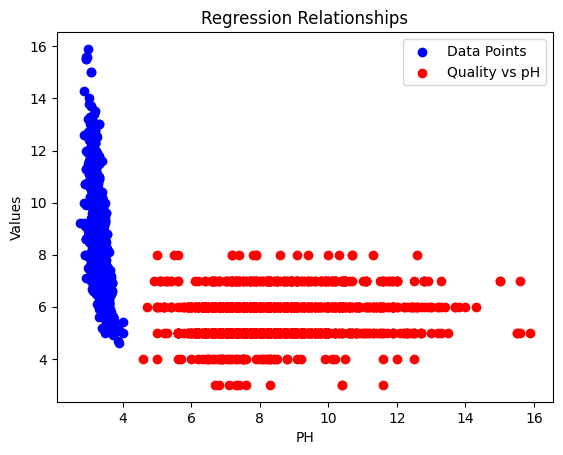

In [58]:
plt.scatter(PH, Acid, color='blue', label='Data Points')
plt.scatter(Acid, Qual, color='red', label='Quality vs pH')
plt.xlabel('PH')
plt.ylabel('Values')
plt.legend()
plt.title('Regression Relationships')
plt.show()

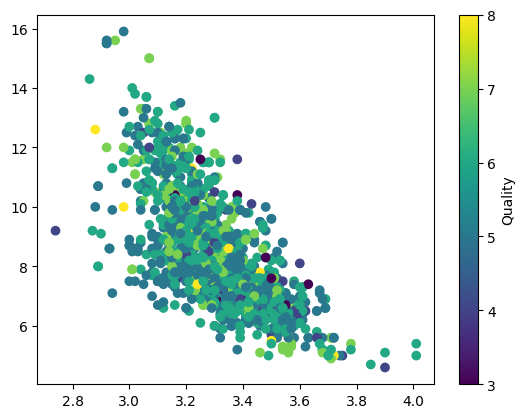

In [59]:
plt.scatter(PH, Acid, c=Qual, cmap='viridis', label='PH vs Acid (Color by Quality)')
plt.colorbar(label='Quality')